<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/processByClass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=da8979a0e4b9372d1a1be813951ac187fcb2538b8951270d846424dbf63da160
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Mounted at /content/drive
-2    11391
 1    11391
Name: Number of Bugs, dtype: int64


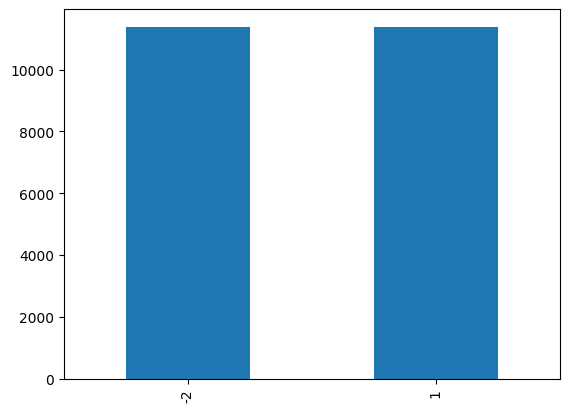

In [ ]:
!pip install sklearn pandas

import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

project = 'elasticsearch'

df = pd.read_csv(f"drive/MyDrive/subtract/{project}/class.csv")

df.drop('Hash', axis=1, inplace=True)
df.drop('LongName', axis=1, inplace=True)

old_df = df.columns
for col in old_df:
  if df[col].max() == df[col].min():
    df.drop(col, axis=1, inplace=True)

duplicate = df[df.duplicated(keep=False)]
df.drop_duplicates(keep=False,inplace=True)

df2 = df[['Number of Bugs']].copy()
df2 = df2[df2.index.isin(df.index)]

df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
data = pd.concat([df, df2],axis=1)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

nb = df['Number of Bugs']

for train_index, test_index in split.split(df, nb):
  train_set = df.loc[train_index]
  test_set = df.loc[test_index]

def normalizeValueOfTarget(value):
  if value == 1 :
    return 1
  else:
     return 0

train_set['Number of Bugs'] = train_set['Number of Bugs'].apply(normalizeValueOfTarget)
test_set['Number of Bugs'] = test_set['Number of Bugs'].apply(normalizeValueOfTarget)

test_target = test_set.pop("Number of Bugs")
test_features = test_set

train_target = train_set.pop("Number of Bugs")
train_features = train_set

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=90)
# fit predictor and target variable
new_train_features, new_train_target = ros.fit_resample(train_features, train_target)
print(new_train_target.value_counts())
new_train_target.value_counts().plot(kind="bar")

columnsToNormalize = list(new_train_features.columns.values)
for column in columnsToNormalize:
  minValueOfCol = new_train_features[column].min()
  maxValueOfCol = new_train_features[column].max()

  new_train_features[column] = (new_train_features[column] - minValueOfCol) / (maxValueOfCol-minValueOfCol)
  test_set[column] = (test_set[column] - minValueOfCol) / (maxValueOfCol-minValueOfCol)

In [ ]:
new_train_features.to_csv('/content/drive/MyDrive/new_df/train_set_1.csv', index=False)

test_set.to_csv("/content/drive/MyDrive/new_df/test_set_1.csv", index=False)

new_train_target.to_csv('/content/drive/MyDrive/new_df/train_set_NB_1.csv', header='Number of Bugs', index=False)

test_target.to_csv("/content/drive/MyDrive/new_df/test_set_NB_1.csv",  header='Number of Bugs', index=False)